In [ ]:
import requests
import pandas as pd
import time
from sqlalchemy import create_engine
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def buscar_todos_dados_df():
    base_url = "https://api.obrasgov.gestao.gov.br/obrasgov/api/projeto-investimento"
    
    todos_dados = []
    pagina = 0
    tamanho_pagina = 100
    
    print("Buscando dados do DF...")
    
    while True:
        params = {"uf": "DF", "page": pagina, "size": tamanho_pagina}
        
        try:
            response = requests.get(base_url, params=params, timeout=30)
            
            if response.status_code == 200:
                dados = response.json()
                
                if not dados['content'] or dados['empty']:
                    break
                
                todos_dados.extend(dados['content'])
                print(f"Página {pagina}: {len(dados['content'])} registros")
                
                if dados['last']:
                    break
                
                pagina += 1
                time.sleep(0.1)
                
            else:
                print(f"Erro: {response.status_code}")
                break
                
        except Exception as e:
            print(f"Erro: {e}")
            break
    
    if todos_dados:
        df = pd.DataFrame(todos_dados)
        print(f"\nBusca concluída: {len(df)} registros")
        return df
    else:
        print("Nenhum dado encontrado")
        return None

# Executar busca
df_projetos_df = buscar_todos_dados_df()

# Análise básica
if df_projetos_df is not None:
    # Mostrar tabela formatada
    colunas_principais = ['idUnico', 'nome', 'situacao', 'dataInicialPrevista', 'dataFinalPrevista']
    colunas_disponiveis = [col for col in colunas_principais if col in df_projetos_df.columns]
    
    if colunas_disponiveis:
        display(df_projetos_df[colunas_disponiveis].head())
    else:
        display(df_projetos_df.head())
    
    print("\nInformações do dataset:")
    print(df_projetos_df.info())
    
    print("\nEstatísticas:")
    print(df_projetos_df.describe())
    
    print(f"\nTotal de colunas: {len(df_projetos_df.columns)}")
    print("\nColunas disponíveis:")
    for i, coluna in enumerate(df_projetos_df.columns, 1):
        print(f"{i:2d}. {coluna}")
    
    # Salvar dados
    df_projetos_df.to_csv('dados_projetos_df.csv', index=False, encoding='utf-8')
    print("\nDados salvos em 'dados_projetos_df.csv'")

Buscando dados do DF...
Página 0: 10 registros

Busca concluída: 10 registros


,idUnico,nome,situacao,dataInicialPrevista,dataFinalPrevista
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,Cadastrada,2024-12-20,2027-12-05
1,42724.53-27,Escola Classe Crixá São Sebastião,Cancelada,2024-09-02,2028-09-02
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,Cadastrada,2021-09-14,2024-08-28
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,Cadastrada,2023-08-30,2028-08-30
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",Cadastrada,2023-09-14,2024-03-14



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   idUnico                             10 non-null     object
 1   nome                                10 non-null     object
 2   cep                                 6 non-null      object
 3   endereco                            6 non-null      object
 4   descricao                           10 non-null     object
 5   funcaoSocial                        10 non-null     object
 6   metaGlobal                          10 non-null     object
 7   dataInicialPrevista                 10 non-null     object
 8   dataFinalPrevista                   10 non-null     object
 9   dataInicialEfetiva                  0 non-null      object
 10  dataFinalEfetiva                    0 non-null      object
 11  dataCadastro                        

In [ ]:
def diagnosticar_paginacao():
    base_url = "https://api.obrasgov.gestao.gov.br/obrasgov/api/projeto-investimento"
    
    params = {"uf": "DF", "page": 0, "size": 100}
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        dados = response.json()
        
        print("DIAGNÓSTICO DA PAGINAÇÃO:")
        print(f"totalElements: {dados['totalElements']}")
        print(f"totalPages: {dados['totalPages']}")
        print(f"number: {dados['number']} (página atual)")
        print(f"size: {dados['size']} (registros por página)")
        print(f"numberOfElements: {dados['numberOfElements']} (nesta página)")
        print(f"first: {dados['first']}")
        print(f"last: {dados['last']}")
        print(f"empty: {dados['empty']}")
        
        # Análise
        if dados['last'] and dados['totalPages'] == 1:
            print(f"\n Só existe 1 página mesmo!")
            print(f"    Total de projetos: {dados['totalElements']}")
            print(f"    Cabem em uma página: {dados['totalElements']} ≤ {dados['size']}")
        else:
            print(f"\n TEM MAIS PÁGINAS!")
            print(f"     Páginas totais: {dados['totalPages']}")
            print(f"     Continue navegando...")

diagnosticar_paginacao()

DIAGNÓSTICO DA PAGINAÇÃO:
totalElements: 10
totalPages: 1
number: 0 (página atual)
size: 10 (registros por página)
numberOfElements: 10 (nesta página)
first: True
last: True
empty: False

 Só existe 1 página mesmo!
    Total de projetos: 10
    Cabem em uma página: 10 ≤ 10


In [ ]:
def verificar_quantidade_df():
    # URL direta com UF=DF
    url = "https://api.obrasgov.gestao.gov.br/obrasgov/api/projeto-investimento?uf=DF&size=1"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        dados = response.json()
        
        print("PROJETOS NO DISTRITO FEDERAL")
        print(f"Total de projetos: {dados['totalElements']:,}")
        print(f"Páginas totais: {dados['totalPages']}")
        print(f"Cabem por página: {dados['size']}")
        
        # Se tiver poucos projetos, mostra alguns exemplos
        if dados['totalElements'] > 0 and dados['totalElements'] <= 50:
            print(f"\n Primeiros projetos:")
            url_exemplos = "https://api.obrasgov.gestao.gov.br/obrasgov/api/projeto-investimento?uf=DF&size=10"
            response_exemplos = requests.get(url_exemplos)
            exemplos = response_exemplos.json()['content']
            
            for i, projeto in enumerate(exemplos, 1):
                print(f"   {i}. {projeto.get('nome', 'N/A')} | {projeto.get('situacao', 'N/A')}")

# Executar verificação
verificar_quantidade_df()

PROJETOS NO DISTRITO FEDERAL
Total de projetos: 10
Páginas totais: 1
Cabem por página: 10

 Primeiros projetos:
   1. DL - 304/2024 - Contratação de instituição para execução de serviços técnico-especializados para realização de atualizações no Método de Dimensionamento de Pavimentos Rígidos do DNI | Cadastrada
   2. Escola Classe Crixá São Sebastião | Cancelada
   3. Reajuste do Contrato 45/2021 - Contrução do Centro de Formação e Aperfeiçoamento de Praças - CEFAP do CBMDF | Cadastrada
   4. Implantação de Passarelas nas Estradas Parque do DF | Cadastrada
   5. obra de construção da  Cabine de Medição, localizado no Setor Central do Campus Universitário Darcy Ribeiro, da Universidade de Brasília, em Brasília/DF | Cadastrada
   6. 202111-22-Ronald 1 | Cadastrada
   7. 202111-22-Ronald 1 | Cadastrada
   8. 202111-22-Ronald 1 | Cadastrada
   9. Reforma Viveiro Agroecologia | Cadastrada
   10. Reforma Agroecologia | Cadastrada


In [ ]:
df_tratado = df_projetos_df.copy()
print(f"Dataset original: {df_tratado.shape}")

print("\nCONVERTENDO DATAS:")
colunas_data = ['dataInicialPrevista', 'dataFinalPrevista', 'dataInicialEfetiva', 'dataFinalEfetiva', 'dataCadastro', 'dataSituacao']

for coluna in colunas_data:
    if coluna in df_tratado.columns:
        df_tratado[coluna] = pd.to_datetime(df_tratado[coluna], errors='coerce')
        print(f" {coluna}: convertida")

# CONVERTER NÚMEROS
print("\nCONVERTENDO NÚMEROS:")
if 'qdtEmpregosGerados' in df_tratado.columns:
    df_tratado['qdtEmpregosGerados'] = pd.to_numeric(df_tratado['qdtEmpregosGerados'], errors='coerce').fillna(0).astype(int)
    print(f" qdtEmpregosGerados: convertido")

if 'populacaoBeneficiada' in df_tratado.columns:
    df_tratado['populacaoBeneficiada'] = pd.to_numeric(df_tratado['populacaoBeneficiada'], errors='coerce').fillna(0).astype(int)
    print(f" populacaoBeneficiada: convertido")

#  NORMALIZAR TEXTO
print("\nNORMALIZANDO TEXTO:")
colunas_texto = ['nome', 'descricao', 'funcaoSocial', 'metaGlobal', 'situacao', 'especie', 'natureza', 'uf']

for coluna in colunas_texto:
    if coluna in df_tratado.columns:
        df_tratado[coluna] = df_tratado[coluna].astype(str).str.strip().str.upper()
        print(f"{coluna}: normalizada")

# TRATAR VALORES AUSENTES
print("\nTRATANDO VALORES AUSENTES:")
colunas_preencher = ['cep', 'endereco', 'naturezaOutras', 'descPlanoNacionalPoliticaVinculado', 'descPopulacaoBeneficiada', 'observacoesPertinentes']

for coluna in colunas_preencher:
    if coluna in df_tratado.columns:
        df_tratado[coluna] = df_tratado[coluna].fillna('NÃO INFORMADO')
        print(f"{coluna}: nulos preenchidos")

# REMOVER DUPLICATAS
print("\nREMOVENDO DUPLICATAS:")
if 'idUnico' in df_tratado.columns:
    duplicatas = df_tratado['idUnico'].duplicated().sum()
    if duplicatas > 0:
        df_tratado = df_tratado.drop_duplicates(subset=['idUnico'])
        print(f"{duplicatas} duplicatas removidas")
    else:
        print("Nenhuma duplicata encontrada")

# RESUMO FINAL
print("\nRESUMO FINAL:")
print(f"Dimensões: {df_tratado.shape}")
print(f"Memória: {df_tratado.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")

# Salvar dados tratados
df_tratado.to_csv('dados_projetos_df_tratados.csv', index=False, encoding='utf-8')
print(f"Dados salvos em 'dados_projetos_df_tratados.csv'")

Dataset original: (10, 31)

CONVERTENDO DATAS:
 dataInicialPrevista: convertida
 dataFinalPrevista: convertida
 dataInicialEfetiva: convertida
 dataFinalEfetiva: convertida
 dataCadastro: convertida
 dataSituacao: convertida

CONVERTENDO NÚMEROS:
 qdtEmpregosGerados: convertido
 populacaoBeneficiada: convertido

NORMALIZANDO TEXTO:
nome: normalizada
descricao: normalizada
funcaoSocial: normalizada
metaGlobal: normalizada
situacao: normalizada
especie: normalizada
natureza: normalizada
uf: normalizada

TRATANDO VALORES AUSENTES:
cep: nulos preenchidos
endereco: nulos preenchidos
naturezaOutras: nulos preenchidos
descPlanoNacionalPoliticaVinculado: nulos preenchidos
descPopulacaoBeneficiada: nulos preenchidos
observacoesPertinentes: nulos preenchidos

REMOVENDO DUPLICATAS:
Nenhuma duplicata encontrada

RESUMO FINAL:
Dimensões: (10, 31)
Memória: 0.0 MB
Dados salvos em 'dados_projetos_df_tratados.csv'


In [ ]:
# 1. COLUNAS NUMÉRICAS DIRETAS
colunas_numericas_diretas = []
for coluna in df_tratado.columns:
    if df_tratado[coluna].dtype in ['int64', 'float64']:
        colunas_numericas_diretas.append(coluna)
        print(f" {coluna}: {df_tratado[coluna].dtype}")

if colunas_numericas_diretas:
    print(f"\n Estatísticas das colunas numéricas diretas:")
    for coluna in colunas_numericas_diretas:
        print(f"   • {coluna}:")
        print(f"      Mín: {df_tratado[coluna].min()}, Máx: {df_tratado[coluna].max()}")
        print(f"      Média: {df_tratado[coluna].mean():.2f}, Soma: {df_tratado[coluna].sum()}")
else:
    print("    Nenhuma coluna numérica direta encontrada")

# 2. COLUNAS DE TEXTO QUE CONTÊM NÚMEROS (podem ser convertidas)
print("\n COLUNAS DE TEXTO QUE PODEM CONTER NÚMEROS:")
print("-" * 45)
colunas_texto_com_numeros = ['qdtEmpregosGerados', 'populacaoBeneficiada']  # Já convertemos essas

for coluna in colunas_texto_com_numeros:
    if coluna in df_tratado.columns:
        print(f" {coluna}: Já convertida para {df_tratado[coluna].dtype}")
        print(f"   Valores únicos: {df_tratado[coluna].unique()}")

# 3. VALORES NUMÉRICOS DENTRO DE COLUNAS COMPLEXAS
print("\nVALORES NUMÉRICOS EM COLUNAS COMPLEXAS:")
print("-" * 45)

# Fontes de Recurso (contém valores financeiros)
if 'fontesDeRecurso' in df_tratado.columns:
    print(" fontesDeRecurso - Valores financeiros:")
    total_investimento = 0
    projetos_com_valor = 0
    
    for fontes in df_tratado['fontesDeRecurso']:
        if isinstance(fontes, list):
            for fonte in fontes:
                if isinstance(fonte, dict) and 'valorInvestimentoPrevisto' in fonte:
                    valor = fonte['valorInvestimentoPrevisto']
                    if valor > 0:
                        total_investimento += valor
                        projetos_com_valor += 1
    
    print(f"   • Total investimento previsto: R$ {total_investimento:,.2f}")
    print(f"   • Projetos com valor informado: {projetos_com_valor}")
    print(f"   • Média por projeto: R$ {total_investimento/max(projetos_com_valor,1):,.2f}")

# Tomadores, Executores, Repassadores (contém códigos)
colunas_com_codigos = ['tomadores', 'executores', 'repassadores']
for coluna in colunas_com_codigos:
    if coluna in df_tratado.columns:
        codigos = []
        for lista_objetos in df_tratado[coluna]:
            if isinstance(lista_objetos, list):
                for obj in lista_objetos:
                    if isinstance(obj, dict) and 'codigo' in obj:
                        codigos.append(obj['codigo'])
        
        if codigos:
            print(f" {coluna}:")
            print(f"   • {len(codigos)} códigos encontrados")
            print(f"   • Códigos únicos: {len(set(codigos))}")
            print(f"   • Exemplos: {sorted(set(codigos))[:5]}...")

# Eixos, Tipos, SubTipos (contém IDs numéricos)
colunas_com_ids = ['eixos', 'tipos', 'subTipos']
for coluna in colunas_com_ids:
    if coluna in df_tratado.columns:
        ids = []
        for lista_objetos in df_tratado[coluna]:
            if isinstance(lista_objetos, list):
                for obj in lista_objetos:
                    if isinstance(obj, dict) and 'id' in obj:
                        ids.append(obj['id'])
        
        if ids:
            print(f" {coluna}:")
            print(f"   • {len(ids)} IDs encontrados")
            print(f"   • IDs únicos: {len(set(ids))}")

# 4. RESUMO DOS VALORES NUMÉRICOS
print("\n RESUMO GERAL DOS VALORES NUMÉRICOS:")
print("-" * 40)

# Empregos gerados
if 'qdtEmpregosGerados' in df_tratado.columns:
    empregos_totais = df_tratado['qdtEmpregosGerados'].sum()
    projetos_com_empregos = (df_tratado['qdtEmpregosGerados'] > 0).sum()
    print(f" EMPREGOS:")
    print(f"   • Total de empregos gerados: {empregos_totais:,}")
    print(f"   • Projetos que geram empregos: {projetos_com_empregos}")

# População beneficiada
if 'populacaoBeneficiada' in df_tratado.columns:
    populacao_total = df_tratado['populacaoBeneficiada'].sum()
    projetos_com_populacao = (df_tratado['populacaoBeneficiada'] > 0).sum()
    print(f" POPULAÇÃO BENEFICIADA:")
    print(f"   • Total de pessoas beneficiadas: {populacao_total:,}")
    print(f"   • Projetos com população beneficiada: {projetos_com_populacao}")

# 5. CONVERSÕES QUE PODEM SER FEITAS
print("\nCONVERSÕES NUMÉRICAS POSSÍVEIS:")
print("-" * 40)

# Verificar colunas de texto que podem conter números
colunas_potencialmente_numericas = []
for coluna in df_tratado.columns:
    if df_tratado[coluna].dtype == 'object' and coluna not in ['nome', 'descricao', 'endereco']:
        # Tentar converter para numérico
        tentativa = pd.to_numeric(df_tratado[coluna], errors='coerce')
        if tentativa.notna().sum() > 0:  # Se conseguiu converter alguns valores
            colunas_potencialmente_numericas.append(coluna)

if colunas_potencialmente_numericas:
    print("Colunas de texto que podem ser convertidas para numérico:")
    for coluna in colunas_potencialmente_numericas:
        tentativa = pd.to_numeric(df_tratado[coluna], errors='coerce')
        valores_validos = tentativa.notna().sum()
        print(f"   • {coluna}: {valores_validos}/{len(df_tratado)} valores numéricos")
else:
    print(" Todas as colunas numéricas já estão tipadas corretamente")

print(f"\n DICA: Os principais valores numéricos estão em:")
print(f"   • fontesDeRecurso (valores financeiros)")
print(f"   • qdtEmpregosGerados (impacto social)") 
print(f"   • populacaoBeneficiada (impacto social)")
print(f"   • IDs em colunas complexas (classificação)")

 qdtEmpregosGerados: int64
 populacaoBeneficiada: int64

 Estatísticas das colunas numéricas diretas:
   • qdtEmpregosGerados:
      Mín: 0, Máx: 30
      Média: 3.00, Soma: 30
   • populacaoBeneficiada:
      Mín: 0, Máx: 385
      Média: 38.50, Soma: 385

 COLUNAS DE TEXTO QUE PODEM CONTER NÚMEROS:
---------------------------------------------
 qdtEmpregosGerados: Já convertida para int64
   Valores únicos: [ 0 30]
 populacaoBeneficiada: Já convertida para int64
   Valores únicos: [  0 385]

VALORES NUMÉRICOS EM COLUNAS COMPLEXAS:
---------------------------------------------
 fontesDeRecurso - Valores financeiros:
   • Total investimento previsto: R$ 433,688,547.12
   • Projetos com valor informado: 10
   • Média por projeto: R$ 43,368,854.71
 tomadores:
   • 5 códigos encontrados
   • Códigos únicos: 2
   • Exemplos: [26230, 26356]...
 executores:
   • 10 códigos encontrados
   • Códigos únicos: 7
   • Exemplos: [26271, 26356, 54844, 308799, 70532000103]...
 repassadores:
   • 9 có

In [ ]:
db_name = 'obras_df.db'

try:
    # Converter colunas complexas
    df_banco = df_tratado.copy()
    
    colunas_json = ['tomadores', 'executores', 'repassadores', 'eixos', 'tipos', 'subTipos', 'fontesDeRecurso']
    
    for coluna in colunas_json:
        if coluna in df_banco.columns:
            df_banco[coluna] = df_banco[coluna].apply(
                lambda x: json.dumps(x) if x is not None else None
            )
    
    # Salvar usando sqlite3 puro (mais simples)
    conn = sqlite3.connect(db_name)
    df_banco.to_sql('projetos', conn, if_exists='replace', index=False)
    
    # Verificação
    cursor = conn.cursor()
    cursor.execute("SELECT COUNT(*) FROM projetos")
    total = cursor.fetchone()[0]
    
    print(f"Dados salvos em {db_name}")
    print(f"{total} registros armazenados")
    print(f"Tabela: projetos")
    
    conn.close()
    
except Exception as e:
    print(f"Erro: {e}")

Dados salvos em obras_df.db
10 registros armazenados
Tabela: projetos


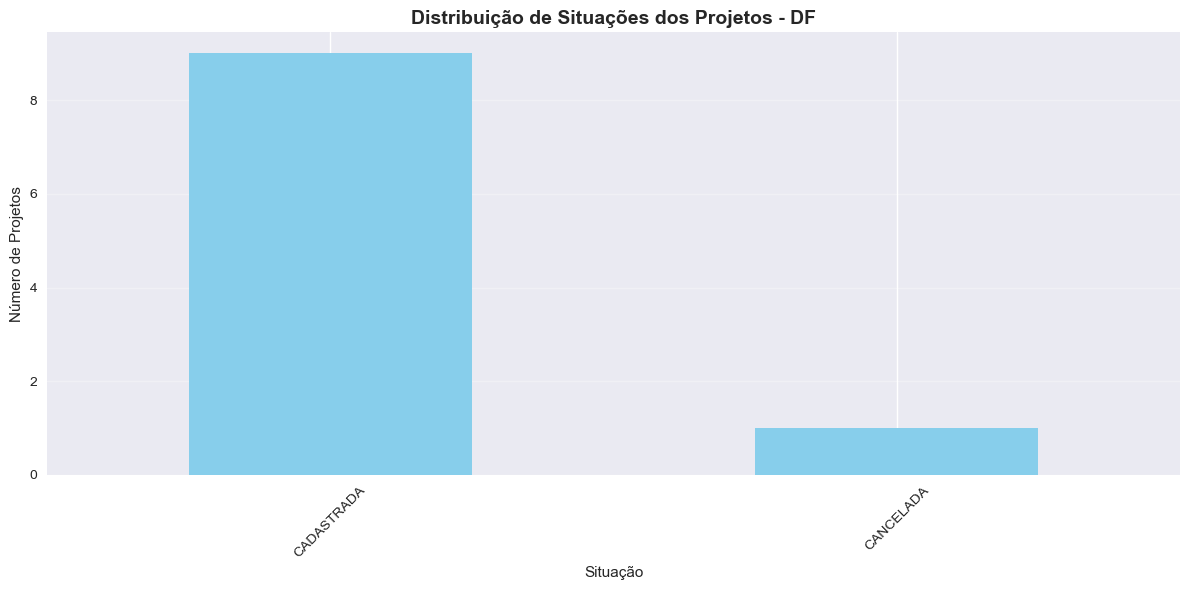

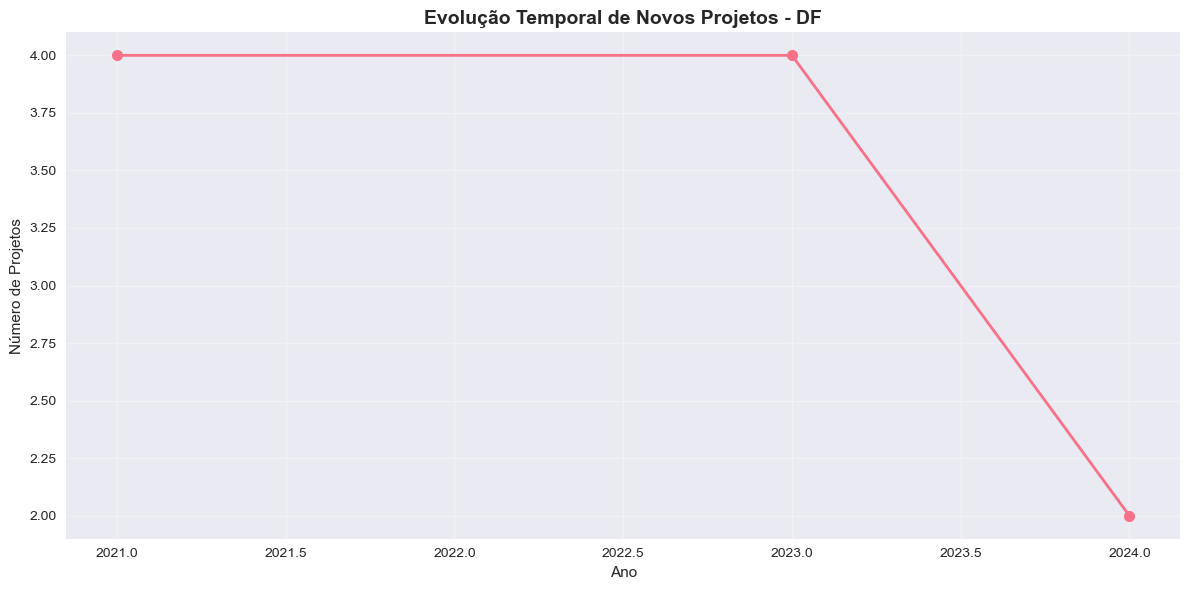

Durações válidas: 7 projetos
Estatísticas de duração: min=152, max=1827, média=856.1


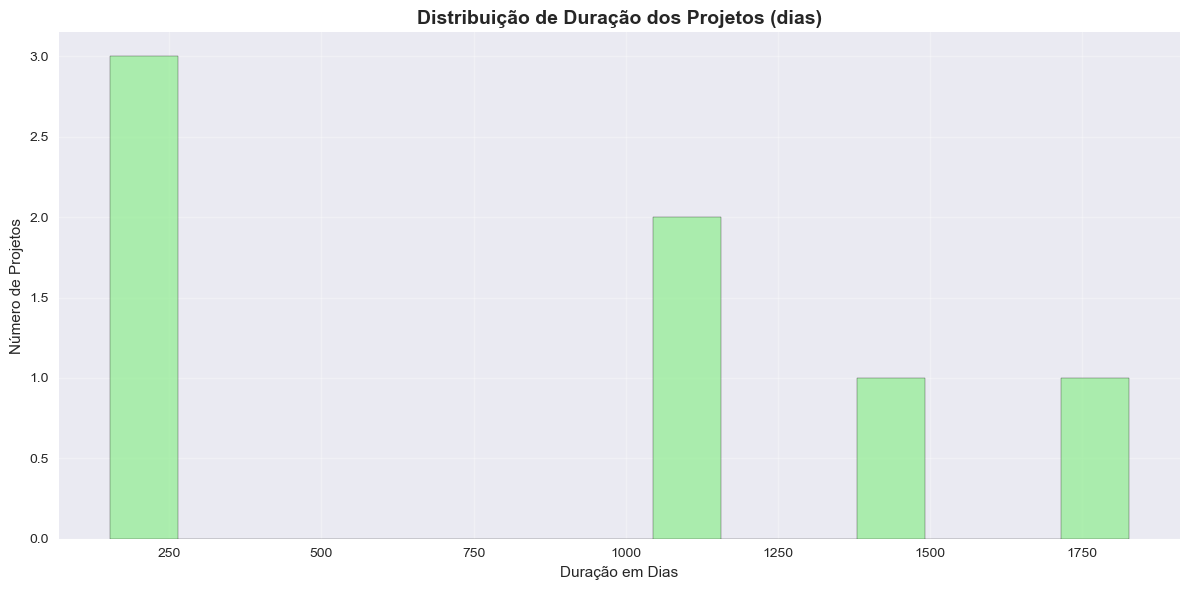

In [ ]:
# Configure o estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Exemplos do que precisa ser criado:
def criar_visualizacoes(df):
    
    # 1. Distribuição de situações dos projetos
    plt.figure(figsize=(12, 6))
    situacao_counts = df['situacao'].value_counts()
    
    situacao_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribuição de Situações dos Projetos - DF', fontsize=14, fontweight='bold')
    plt.xlabel('Situação')
    plt.ylabel('Número de Projetos')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 2. Timeline de projetos por ano (se datas existirem)
    if 'dataInicialPrevista' in df.columns and df['dataInicialPrevista'].notna().any():
        df['ano_inicio'] = df['dataInicialPrevista'].dt.year
        projetos_por_ano = df['ano_inicio'].value_counts().sort_index()
                
        plt.figure(figsize=(12, 6))
        projetos_por_ano.plot(kind='line', marker='o', linewidth=2, markersize=8)
        plt.title('Evolução Temporal de Novos Projetos - DF', fontsize=14, fontweight='bold')
        plt.xlabel('Ano')
        plt.ylabel('Número de Projetos')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(" Coluna dataInicialPrevista não disponível para análise temporal")
    
    # 3. Análise de durações dos projetos
    if all(col in df.columns for col in ['dataInicialPrevista', 'dataFinalPrevista']):
        # Verificar se as colunas de data são do tipo datetime
        if (df['dataInicialPrevista'].dtype == 'datetime64[ns]' and 
            df['dataFinalPrevista'].dtype == 'datetime64[ns]'):
            
            df['duracao_dias'] = (df['dataFinalPrevista'] - df['dataInicialPrevista']).dt.days
            
            # Filtrar durações válidas (positivas)
            duracao_valida = df['duracao_dias'].dropna()
            duracao_valida = duracao_valida[duracao_valida > 0]
            
            if not duracao_valida.empty:
                print(f"Durações válidas: {len(duracao_valida)} projetos")
                print(f"Estatísticas de duração: min={duracao_valida.min()}, max={duracao_valida.max()}, média={duracao_valida.mean():.1f}")
                
                plt.figure(figsize=(12, 6))
                plt.hist(duracao_valida, bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
                plt.title('Distribuição de Duração dos Projetos (dias)', fontsize=14, fontweight='bold')
                plt.xlabel('Duração em Dias')
                plt.ylabel('Número de Projetos')
                plt.grid(alpha=0.3)
                plt.tight_layout()
                plt.show()
            else:
                print("Não há durações válidas para mostrar")
        else:
            print("Colunas de data não estão no formato datetime")
    else:
        print("Colunas de data não disponíveis para análise de duração")
       
criar_visualizacoes(df_tratado)  